This is a dataset on Chicago traffic crashes and was retrieved from the Kaggle website. This dataset consist of accident related data from the years 2015 through 2023. In this python project I will write code to answer the folowing questions below:

How many accidents/type of accidents by year?
How many accidents/type of accidents by month?
How many accidents/type of accidents by day?
Average time for police to be notified from the time of accident?
Average time for police to be notified from the time of a fatal accident?
What was the maximum time it took for police to be notified from the time of an accident?
Total fatal injuries?
Total incapacitating injuries?
Total non-incapacitating injuries?
Total injuries and percentage of total with respect to most severe injury?
Maximum injuries by roadway surface condition?
Monthly trend showing comparinson of injuries for current year and previous year?
Maximum injuries by first crash type for current year?
Distribution of total injuries by damage?
Relation between fatal injuries by crash type?

In this project I will demonstrate reading data into a dataframe utilizing the pandas library, data cleaning by removing existing or adding additional columns and removing any null or duplicated values as needed, data transformation by correcting any datatypes that may be in the incorrect format, data processing by performing mathematical calculations on numerical columns utilizing the numpy library, and creating visuals utilizing the matplotlib and seaborn libraries.


Now I will import a few of the libraries that I will use for this project and set a few options:

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px
style.use("ggplot") 

Time to read my data into a pandas dataframe:

In [2]:
# chicago_crashes = pd.read_excel(r"C:\Users\mjaso\OneDrive\ChicagoTrafficCrashes.xlsx")
chicago_crashes = pd.read_excel(r"C:\Users\Jason\OneDrive\ChicagoTrafficCrashes.xlsx")

Now that the data is into a dataframe, lets take a look at the first and last 5 rows of the data to check its consistency, here is the first 5 rows:

In [3]:
chicago_crashes.head(5)


,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,2023-09-05 19:05:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",2023-09-05 19:05:00,UNABLE TO DETERMINE,5500,S,WENTWORTH AVE,225.0,2,INCAPACITATING INJURY,3.0,0.0,1.0,2.0,0.0,2.0,0.0,19,3,9
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,2023-09-22 18:45:00,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",2023-09-22 18:50:00,FOLLOWING TOO CLOSELY,7900,S,CHICAGO SKYWAY OB,411.0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,6,9
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,2023-07-29 14:45:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",2023-07-29 14:45:00,FAILING TO REDUCE SPEED TO AVOID CRASH,2101,S,ASHLAND AVE,1235.0,4,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,7,7
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,2023-08-09 23:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",2023-08-09 23:40:00,FAILING TO YIELD RIGHT-OF-WAY,10020,W,BALMORAL AVE,1650.0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,23,4,8
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,2023-08-18 12:50:00,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",2023-08-18 12:55:00,FOLLOWING TOO CLOSELY,700,W,OHARE ST,1654.0,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12,6,8


And now the last 5 rows:

In [4]:
chicago_crashes.tail(5)

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
794951,b4944ab32a9f692cf95c2645b6683f032e74932532947d...,2023-11-06 07:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"$501 - $1,500",2023-11-06 14:12:00,IMPROPER BACKING,1110,W,BELDEN AVE,1811.0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7,2,11
794952,d4bca3b24c17b9af828558fc95699da3c57fe7ea07daf5...,2023-10-31 18:30:00,30,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,SIDESWIPE SAME DIRECTION,OTHER,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"$501 - $1,500",2023-11-07 19:14:00,UNABLE TO DETERMINE,9500,S,STONY ISLAND AVE,511.0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,3,10
794953,ef84ea51375f9e29d55d99fb2b1dfaf8ea9d1fbc0f667e...,2023-11-04 23:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",2023-11-07 16:50:00,IMPROPER BACKING,44,E,104TH ST,512.0,3,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23,7,11
794954,9ba7b0e570841fc865b62892fb4931684ce4abe8162ee1...,2023-11-06 18:35:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",2023-11-06 18:40:00,UNABLE TO DETERMINE,5115,W,63RD ST,813.0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,4.0,0.0,18,2,11
794955,b2bd97994325bbc4c059742f1d87453b6364e6eb245809...,2023-11-06 19:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",2023-11-06 20:30:00,FAILING TO YIELD RIGHT-OF-WAY,4653,S,WESTERN AVE,922.0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,19,2,11


Lets take a look at the size of this dataset:

In [5]:
chicago_crashes.shape
print(f"There are {chicago_crashes.shape[0]} rows and {chicago_crashes.shape[1]} columns of data.") 

There are 794956 rows and 33 columns of data.


Now lets see what type of datatypes each column has:

In [6]:
chicago_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794956 entries, 0 to 794955
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                794956 non-null  object        
 1   CRASH_DATE                     794956 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT             794956 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE         794956 non-null  object        
 4   DEVICE_CONDITION               794956 non-null  object        
 5   WEATHER_CONDITION              794956 non-null  object        
 6   LIGHTING_CONDITION             794956 non-null  object        
 7   FIRST_CRASH_TYPE               794956 non-null  object        
 8   TRAFFICWAY_TYPE                794956 non-null  object        
 9   ALIGNMENT                      794956 non-null  object        
 10  ROADWAY_SURFACE_COND           794956 non-null  object        
 11  

After peeking at the datatypes for the columns, it looks like we have a few columns that have decimals as their datatypes. These columns should be formatted as integers. We have a little data cleaning to be done. In this data cleaning process, we will begin by checking for and removing any null and duplicated values from the dataset. Once that has been completed, we will then change all float datatypes to the correct integer datatype. After that, we will extract the year, month, day, and time from the 'CRASH_DATE' and 'DATE_POLICE_NOTIFIED' columns and create new columns in the process, which is known as data transformation. Then, we will create another column named 'POLICE_RESPONSE_TIME' based on the difference from the 'DATE_POLICE_NOTIFIED' and 'CRASH_DATE', this step is known as data processing.



Lets check for any duplicated rows of data:

In [7]:
chicago_crashes.duplicated().sum()
print(f"There are {chicago_crashes.duplicated().sum()} rows of duplicated data in this dataset.") 

There are 0 rows of duplicated data in this dataset.


Lets have a look at the the number of N/A values per column:

In [8]:
for col in chicago_crashes.columns:
    null_values = chicago_crashes[col].isnull().sum()
    print(f"The column {col} has {null_values} N/A values") 

The column CRASH_RECORD_ID has 0 N/A values
The column CRASH_DATE has 0 N/A values
The column POSTED_SPEED_LIMIT has 0 N/A values
The column TRAFFIC_CONTROL_DEVICE has 0 N/A values
The column DEVICE_CONDITION has 0 N/A values
The column WEATHER_CONDITION has 0 N/A values
The column LIGHTING_CONDITION has 0 N/A values
The column FIRST_CRASH_TYPE has 0 N/A values
The column TRAFFICWAY_TYPE has 0 N/A values
The column ALIGNMENT has 0 N/A values
The column ROADWAY_SURFACE_COND has 0 N/A values
The column ROAD_DEFECT has 0 N/A values
The column REPORT_TYPE has 23258 N/A values
The column CRASH_TYPE has 0 N/A values
The column DAMAGE has 0 N/A values
The column DATE_POLICE_NOTIFIED has 0 N/A values
The column PRIM_CONTRIBUTORY_CAUSE has 0 N/A values
The column STREET_NO has 0 N/A values
The column STREET_DIRECTION has 4 N/A values
The column STREET_NAME has 1 N/A values
The column BEAT_OF_OCCURRENCE has 5 N/A values
The column NUM_UNITS has 0 N/A values
The column MOST_SEVERE_INJURY has 1752

As we can see, we only have a few columns with null values. However, it is essential that the null values be addressed in order to proceed with accurate analysis. There are a few options to achieve that goal but in this case, we will simply remove all null values from the dataset.

In [9]:
chicago_crashes.dropna(inplace=True)

Great! Now all of the null rows of data have been removed, so we will verify this by rechecking the rows of data:

In [10]:
for col in chicago_crashes.columns:
    null_values = chicago_crashes[col].isnull().sum()
    print(f"The column {col} now has {null_values} N/A values") 

The column CRASH_RECORD_ID now has 0 N/A values
The column CRASH_DATE now has 0 N/A values
The column POSTED_SPEED_LIMIT now has 0 N/A values
The column TRAFFIC_CONTROL_DEVICE now has 0 N/A values
The column DEVICE_CONDITION now has 0 N/A values
The column WEATHER_CONDITION now has 0 N/A values
The column LIGHTING_CONDITION now has 0 N/A values
The column FIRST_CRASH_TYPE now has 0 N/A values
The column TRAFFICWAY_TYPE now has 0 N/A values
The column ALIGNMENT now has 0 N/A values
The column ROADWAY_SURFACE_COND now has 0 N/A values
The column ROAD_DEFECT now has 0 N/A values
The column REPORT_TYPE now has 0 N/A values
The column CRASH_TYPE now has 0 N/A values
The column DAMAGE now has 0 N/A values
The column DATE_POLICE_NOTIFIED now has 0 N/A values
The column PRIM_CONTRIBUTORY_CAUSE now has 0 N/A values
The column STREET_NO now has 0 N/A values
The column STREET_DIRECTION now has 0 N/A values
The column STREET_NAME now has 0 N/A values
The column BEAT_OF_OCCURRENCE now has 0 N/A val

Lets look at how the dataset has changed now:

In [11]:
print(f"We now have {chicago_crashes.shape[0]} rows and {chicago_crashes.shape[1]} columns of data now.")

We now have 769981 rows and 33 columns of data now.


Now lets change all float datatypes to the correct integer datatypes:

In [12]:
chicago_crashes["BEAT_OF_OCCURRENCE"] = chicago_crashes["BEAT_OF_OCCURRENCE"].astype(int)
chicago_crashes["INJURIES_TOTAL"] = chicago_crashes["INJURIES_TOTAL"].astype(int)
chicago_crashes["INJURIES_FATAL"] = chicago_crashes["INJURIES_FATAL"].astype(int)
chicago_crashes["INJURIES_INCAPACITATING"] = chicago_crashes["INJURIES_INCAPACITATING"].astype(int)
chicago_crashes["INJURIES_NON_INCAPACITATING"] = chicago_crashes["INJURIES_NON_INCAPACITATING"].astype(int)
chicago_crashes["INJURIES_REPORTED_NOT_EVIDENT"] = chicago_crashes["INJURIES_REPORTED_NOT_EVIDENT"].astype(int)
chicago_crashes["INJURIES_NO_INDICATION"] = chicago_crashes["INJURIES_NO_INDICATION"].astype(int)
chicago_crashes["INJURIES_UNKNOWN"] = chicago_crashes["INJURIES_UNKNOWN"].astype(int)

Lets check the datatypes to vefify that our changes have been properly made:

In [13]:
chicago_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769981 entries, 0 to 794955
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                769981 non-null  object        
 1   CRASH_DATE                     769981 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT             769981 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE         769981 non-null  object        
 4   DEVICE_CONDITION               769981 non-null  object        
 5   WEATHER_CONDITION              769981 non-null  object        
 6   LIGHTING_CONDITION             769981 non-null  object        
 7   FIRST_CRASH_TYPE               769981 non-null  object        
 8   TRAFFICWAY_TYPE                769981 non-null  object        
 9   ALIGNMENT                      769981 non-null  object        
 10  ROADWAY_SURFACE_COND           769981 non-null  object        
 11  

Perfect! We will now extract the year, month, and day from the 'CRASH_DATE" and 'DATE_POLICE_NOTIFIED' columns to create thier own seperate columns for analysis:

In [14]:
chicago_crashes["CRASH_YEAR"] = chicago_crashes["CRASH_DATE"].dt.year
chicago_crashes["POLICE_NOTIFIED_YEAR"] = chicago_crashes["DATE_POLICE_NOTIFIED"].dt.year
chicago_crashes["CRASH_DAY"] = chicago_crashes["CRASH_DATE"].dt.day_name()
chicago_crashes["POLICE_NOTIFIED_DAY"] = chicago_crashes["DATE_POLICE_NOTIFIED"].dt.day_name()

Lets take a look at our columns to verify that the correct changes have been made:

In [15]:
chicago_crashes.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'CRASH_YEAR',
       'POLICE_NOTIFIED_YEAR', 'CRASH_DAY', 'POLICE_NOTIFIED_DAY'],
      dtype='object')

As we can see, the four new columns have been added to our dataset as expected.

Now we will create a column called 'POLICE_RESPONSE_TIME' based on the difference between the time the police were notified and the crash time. To complete this, we will first need to create a 'CRASH_TIME' and 'POLICE_NOTIFIED_TIME' column:

In [16]:
chicago_crashes["CRASH_TIME"] = chicago_crashes["CRASH_DATE"].dt.time
chicago_crashes["POLICE_NOTIFIED_TIME"] = chicago_crashes["DATE_POLICE_NOTIFIED"].dt.time


Lets check the first 3 values in each row of the columns to verify that all of the data is correct:

In [17]:
chicago_crashes.head(3)

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR,POLICE_NOTIFIED_YEAR,CRASH_DAY,POLICE_NOTIFIED_DAY,CRASH_TIME,POLICE_NOTIFIED_TIME
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,2023-09-05 19:05:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",2023-09-05 19:05:00,UNABLE TO DETERMINE,5500,S,WENTWORTH AVE,225,2,INCAPACITATING INJURY,3,0,1,2,0,2,0,19,3,9,2023,2023,Tuesday,Tuesday,19:05:00,19:05:00
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,2023-09-22 18:45:00,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",2023-09-22 18:50:00,FOLLOWING TOO CLOSELY,7900,S,CHICAGO SKYWAY OB,411,2,NO INDICATION OF INJURY,0,0,0,0,0,2,0,18,6,9,2023,2023,Friday,Friday,18:45:00,18:50:00
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,2023-07-29 14:45:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",2023-07-29 14:45:00,FAILING TO REDUCE SPEED TO AVOID CRASH,2101,S,ASHLAND AVE,1235,4,NO INDICATION OF INJURY,0,0,0,0,0,1,0,14,7,7,2023,2023,Saturday,Saturday,14:45:00,14:45:00


Ok, everything looks as it should. Now its time that we calculate the police response time to each accident. To do this, we will create a new column named 'POLICE_RESPONSE_TIME' and fill it with the difference between the 'POLICE_NOTIFIED_TIME' and 'CRASH_TIME' in minutes:

In [18]:
chicago_crashes["MINS_FOR_POLICE_TO_BE_NOTIFIED"] = chicago_crashes["DATE_POLICE_NOTIFIED"].dt.minute - chicago_crashes["CRASH_DATE"].dt.minute
chicago_crashes["MINS_FOR_POLICE_TO_BE_NOTIFIED"][:5]

0     0
1     5
2     0
3    40
4     5
Name: MINS_FOR_POLICE_TO_BE_NOTIFIED, dtype: int64

Great. Now that I've previewed the first 5 rows of that newly calculated column, we will now begin to answer a few questions:


What year had the most accidents?

In [19]:
chicago_crashes.groupby("CRASH_YEAR")["CRASH_RECORD_ID"].nunique()

CRASH_YEAR
2013         2
2014         6
2015      9807
2016     43948
2017     81983
2018    115598
2019    113870
2020     89190
2021    105127
2022    104095
2023    105863
2024       492
Name: CRASH_RECORD_ID, dtype: int64

It appears that the year 2018 has experienced the most traffic accidents in the city of Chicago. Now lets visualize that in a bar graph.

2018 had the most accidents by year, while 2013 had the least.


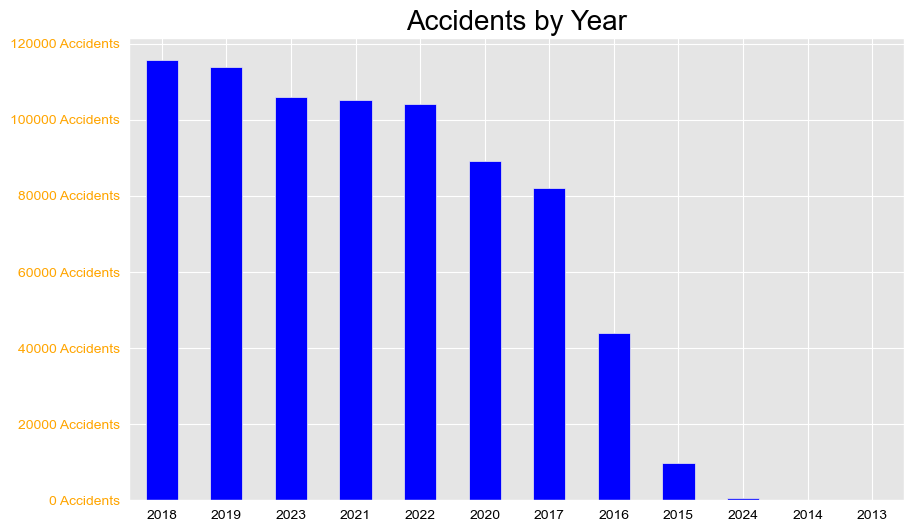

In [20]:
plt.figure(figsize=(10, 6))
chicago_crashes.groupby("CRASH_YEAR")["CRASH_RECORD_ID"].nunique().sort_values(ascending=False).plot(kind="bar", 
                                                                                                     rot=0, 
                                                                                                     color="blue"),
plt.title("Accidents by Year", 
          color="black", 
          fontsize=20),
ticks = list(range(0, 124000, 20000))
plt.yticks(ticks, [f"{x} Accidents" for x in ticks], 
           color="orange"),
plt.ylabel(""),
plt.xlabel(""),
plt.xticks(color="Black")
print(f"2018 had the most accidents by year, while 2013 had the least.")

What year had the most fatal accidents?

In [21]:
# chicago_crashes.groupby("CRASH_YEAR")["INJURIES_FATAL"].value_counts()
chicago_crashes[chicago_crashes["INJURIES_FATAL"] >= 1].groupby("CRASH_YEAR")["CRASH_RECORD_ID"].nunique()

CRASH_YEAR
2015      3
2016     13
2017     67
2018     85
2019     79
2020    102
2021    120
2022    107
2023    112
Name: CRASH_RECORD_ID, dtype: int64

The year 2021 experienced the most fatal accidents in the city of Chicago. Lets visualize that!

The year 2021 had the most fatal accidents with 120, while the year 2015 experienced the least with a total of 3.


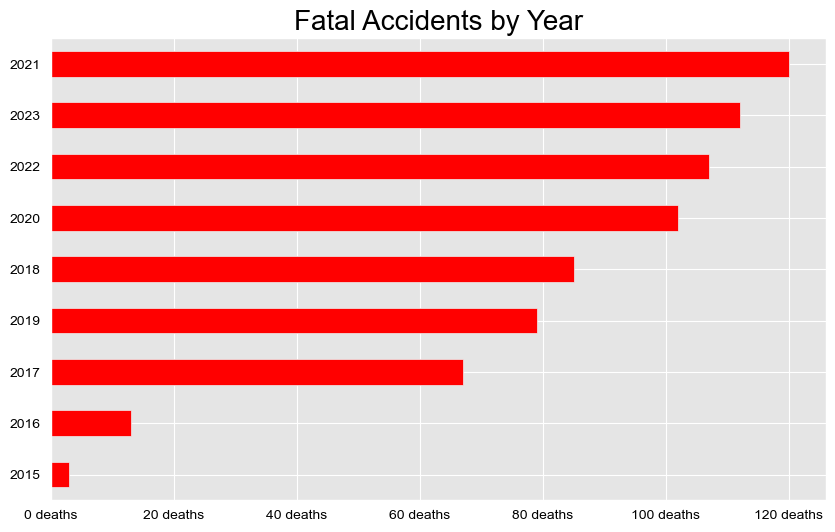

In [22]:
plt.figure(figsize=(10, 6))
chicago_crashes[chicago_crashes["INJURIES_FATAL"] >= 1].groupby("CRASH_YEAR")["CRASH_RECORD_ID"].nunique().sort_values(ascending=True).plot(kind="barh", 
                                                                                                                                            color="red"),
plt.title("Fatal Accidents by Year", 
          color="black", 
          fontsize=20),
ticks = list(range(0, 140, 20))
plt.xticks(ticks, [f"{x} deaths" for x in ticks], 
           color="black")
plt.ylabel(""),
plt.yticks(color="black"),
plt.xticks(color="black")
print("The year 2021 had the most fatal accidents with 120, while the year 2015 experienced the least with a total of 3.")


How many incapacitating accidents were there by year?

In [23]:
chicago_crashes[chicago_crashes["INJURIES_INCAPACITATING"] >= 1].groupby("CRASH_YEAR")["CRASH_RECORD_ID"].nunique()

CRASH_YEAR
2015      52
2016     274
2017    1205
2018    2046
2019    1872
2020    1795
2021    1916
2022    1815
2023    1747
2024       8
Name: CRASH_RECORD_ID, dtype: int64

Now lets visualize these results in a line graph.

The line graph helps us easily identify the trend in the accidents by year.


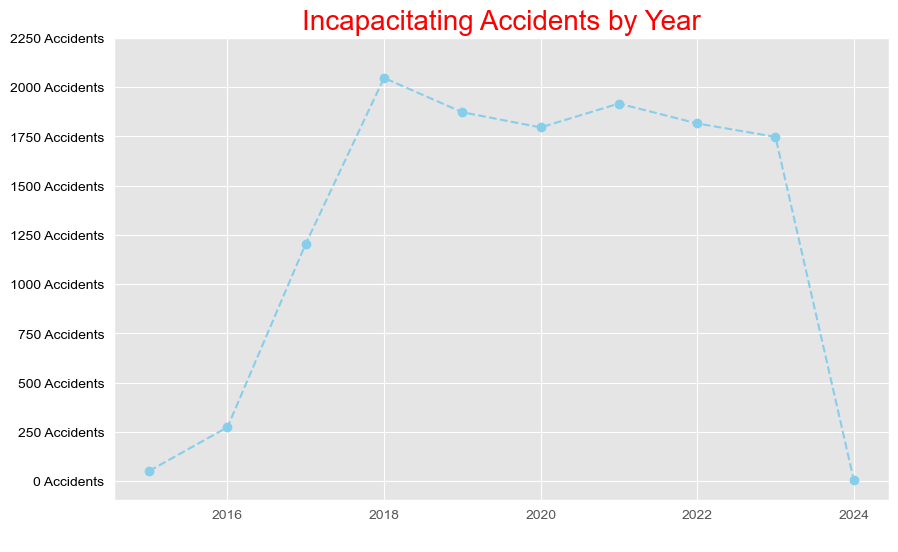

In [24]:
plt.figure(figsize=(10, 6))
chicago_crashes[chicago_crashes["INJURIES_INCAPACITATING"] >= 1].groupby("CRASH_YEAR")["CRASH_RECORD_ID"].nunique().plot(kind="line", 
                                                                                                                         color="skyblue", 
                                                                                                                         linestyle="--", 
                                                                                                                         marker="o", 
                                                                                                                         label="line with marker") 
plt.title("Incapacitating Accidents by Year", 
          fontsize=20, 
          color="red")
acc = list(range(0, 2500, 250))
plt.yticks(acc, [f"{x} Accidents" for x in acc], 
           color="black")
plt.xlabel(" ")
print("The line graph helps us easily identify the trend in the accidents by year.")

How many total accidents were there by month?

In [25]:
chicago_crashes.groupby("CRASH_MONTH")["CRASH_RECORD_ID"].nunique()

CRASH_MONTH
1     56455
2     55769
3     56881
4     55305
5     64458
6     65408
7     66731
8     68665
9     70206
10    74355
11    67211
12    68537
Name: CRASH_RECORD_ID, dtype: int64

We can see a trend of fewer accidents in the first four months of the year and then gradually increasing each month until October, then decreasing in November and rising slightly in December.


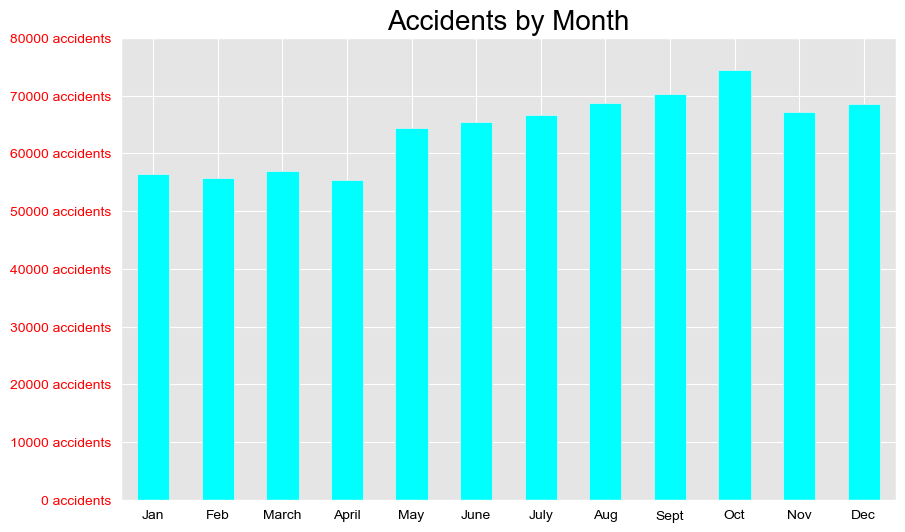

In [26]:
plt.figure(figsize=(10, 6))
chicago_crashes.groupby("CRASH_MONTH")["CRASH_RECORD_ID"].nunique().plot(kind="bar", 
                                                                         color="cyan", 
                                                                         rot=0)
plt.title("Accidents by Month", 
          color="black", 
          fontsize=20)
accident = list(range(0,90000,10000))
plt.yticks(accident, [f"{a} accidents" for a in accident], 
           color="red")
plt.xlabel("") 
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], 
           ["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"], 
           color="black")
print("We can see a trend of fewer accidents in the first four months of the year and then gradually increasing each month until October, then decreasing in November and rising slightly in December.")

How many fatal accidents are there by month?

In [27]:
chicago_crashes[chicago_crashes["INJURIES_FATAL"] >= 1].groupby("CRASH_MONTH")["CRASH_RECORD_ID"].nunique()

CRASH_MONTH
1     51
2     44
3     38
4     37
5     57
6     61
7     76
8     71
9     68
10    65
11    54
12    66
Name: CRASH_RECORD_ID, dtype: int64

Lets visualize the number of fatal accidents by month over a line graph.

The number of fatal accidents begins at 51 in January and gradually decreases until the month of April where they hit 37. They amount of fatal accidents increases continually in the month of May
where they are at 57 until the month of July, where they are 76 and begin to gradually decrease until the month of November where they hit 54. The number of fatal accidents then begin to increase 
again in the month of December to 66.


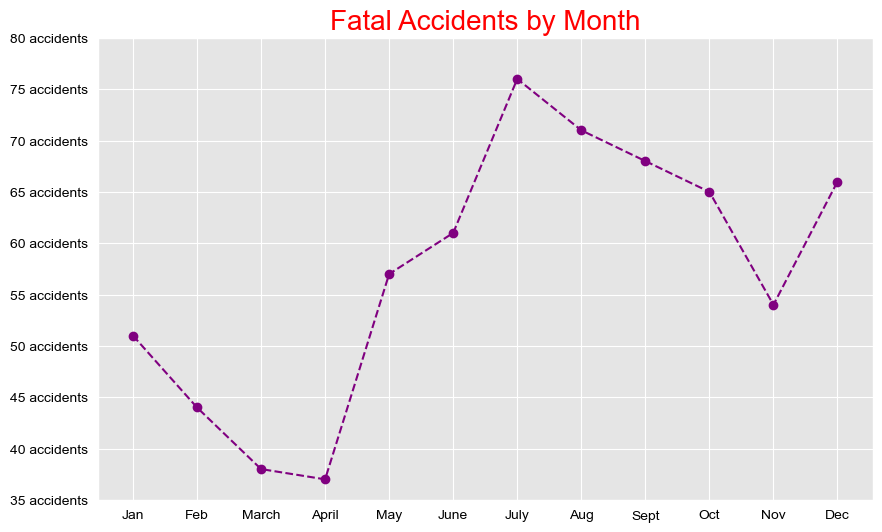

In [28]:
plt.figure(figsize=(10, 6))
chicago_crashes[chicago_crashes["INJURIES_FATAL"] >= 1].groupby("CRASH_MONTH")["CRASH_RECORD_ID"].nunique().plot(kind="line", 
                                                                                                                 color="purple", 
                                                                                                                 linestyle="--", 
                                                                                                                 marker="o", 
                                                                                                                 label="line with markder") 
plt.title("Fatal Accidents by Month", 
          color="red", 
          fontsize=20)
ticks = list(range(35, 85, 5))
plt.yticks(ticks, [f"{x} accidents" for x in ticks], color="black")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], 
           ["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"], 
           color="black")
plt.xlabel("")
print("""The number of fatal accidents begins at 51 in January and gradually decreases until the month of April where they hit 37. They amount of fatal accidents increases continually in the month of May
where they are at 57 until the month of July, where they are 76 and begin to gradually decrease until the month of November where they hit 54. The number of fatal accidents then begin to increase 
again in the month of December to 66.""")

What was the average amount of time (in minutes) for police to be notified after an accident?

In [29]:
avg_response_time = round(chicago_crashes["MINS_FOR_POLICE_TO_BE_NOTIFIED"].mean(), 2)
print(f"On average, it took police around {avg_response_time} minutes to be notified to an accident.")

On average, it took police around 2.28 minutes to be notified to an accident.


What was the maximum amount of time (in minutes) for police to be notified after an accident?

In [30]:
max_response_time = round(chicago_crashes["MINS_FOR_POLICE_TO_BE_NOTIFIED"].max(), 2)
print(f"The maximum response time for the police to be notified to an accident was {max_response_time} minutes.") 

The maximum response time for the police to be notified to an accident was 59 minutes.


What was the minimum amount of time (in minutes) for police to be notified after an accident?

In [31]:
min_response_time = chicago_crashes[chicago_crashes["MINS_FOR_POLICE_TO_BE_NOTIFIED"] >= 0]["MINS_FOR_POLICE_TO_BE_NOTIFIED"].min()
print(f"The minimum response time for the police to be notified to an accident was {min_response_time} minutes. Essentially the police were called as soon as the accident occured!") 

The minimum response time for the police to be notified to an accident was 0 minutes. Essentially the police were called as soon as the accident occured!


How many total injuries were there in respect to the most severe injuries?

In [32]:
chicago_crashes.groupby("MOST_SEVERE_INJURY")["INJURIES_TOTAL"].sum()

MOST_SEVERE_INJURY
FATAL                        1187
INCAPACITATING INJURY       18680
NO INDICATION OF INJURY         0
NONINCAPACITATING INJURY    80094
REPORTED, NOT EVIDENT       41213
Name: INJURIES_TOTAL, dtype: int32

OK, now lets visualize the percentages of the most severe injuries in contrast to the total injuries.

According to the data, less than 1 percent of all injury types are fatal.


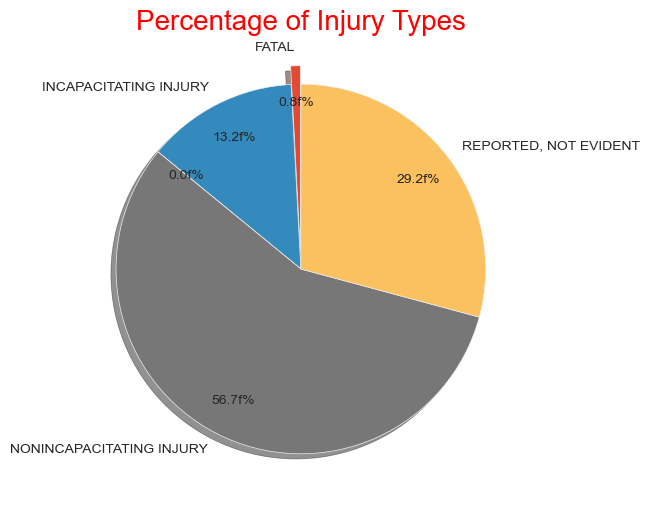

In [33]:
plt.figure(figsize=(10, 6))
e = [0.1, 0, 0, 0, 0]
chicago_crashes.groupby("MOST_SEVERE_INJURY")["INJURIES_TOTAL"].sum().plot(kind="pie", 
                                                                           shadow=True, 
                                                                           startangle=90, 
                                                                           autopct="%1.1ff%%", 
                                                                           pctdistance=0.8, 
                                                                           explode=e)
plt.title("Percentage of Injury Types", 
          color="red", 
          fontsize=20)
plt.ylabel("")
print(f"According to the data, less than 1 percent of all injury types are fatal.") 


Now, lets take a look at year over year growth for total injuries:

What is the year over year growth for total injuries for the year 2023/22?

###### The formula for YOY Growth = (Current Year-Previous Year) / Previoys Year. So what we will do to answer this question is first create two variables, one being the total injuries for the year 2023, and the next being the total injuries for the year 2022. Then we will simply plug those variables into the YOY Growth formula to get the value that we are searching for. 

In [34]:
Injury_Total_23 = chicago_crashes[chicago_crashes["CRASH_YEAR"] == 2023]["INJURIES_TOTAL"].sum()
Injury_Total_23

Injury_Total_22 = chicago_crashes[chicago_crashes["CRASH_YEAR"] == 2022]["INJURIES_TOTAL"].sum()
Injury_Total_22

Total_YoY_Growth_23 = round((Injury_Total_23 - Injury_Total_22) / Injury_Total_22, 2)
Total_YoY_Growth_23

print(f"The Year over year growth for total injuries for the 2023/2022 year is {Total_YoY_Growth_23}%.") 

The Year over year growth for total injuries for the 2023/2022 year is 0.05%.


What is the year over year growth for fatal injuries for the year 2024/23?

In [35]:
Fatal_Injury_Total_24 = chicago_crashes[chicago_crashes["CRASH_YEAR"] == 2024]["INJURIES_FATAL"].sum()
Fatal_Injury_Total_24

Fatal_Injury_Total_23 = chicago_crashes[chicago_crashes["CRASH_YEAR"] == 2023]["INJURIES_FATAL"].sum()
Fatal_Injury_Total_23

Fatal_YoY_Growth_24 = round((Fatal_Injury_Total_24 - Fatal_Injury_Total_23) / Fatal_Injury_Total_23, 2)
Fatal_YoY_Growth_24

print(f"The Year over year growth for total injuries for the 2023/2022 year is {Fatal_YoY_Growth_24}%.") 

The Year over year growth for total injuries for the 2023/2022 year is -1.0%.


What is the distribution of total injuries by damage?

In [36]:
chicago_crashes.groupby("DAMAGE")["INJURIES_TOTAL"].count()

DAMAGE
$500 OR LESS      88914
$501 - $1,500    206575
OVER $1,500      474492
Name: INJURIES_TOTAL, dtype: int64

Lets visualize the above results in the form of a bar graph:

Majority of the total injuries by damage fell in the 'over $1500' category, with the total being 474,492.


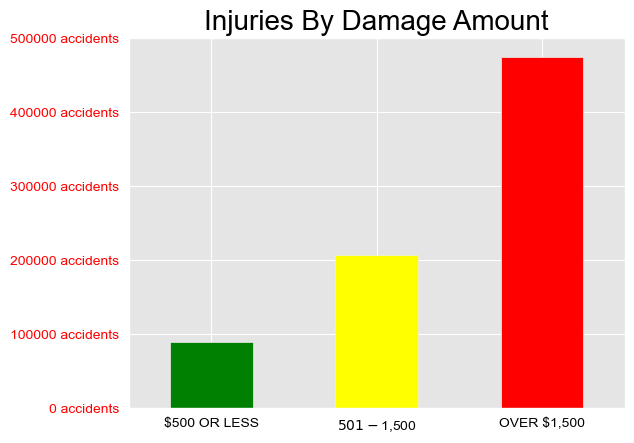

In [37]:
c = ["green", 
     "yellow", 
     "red"]
chicago_crashes.groupby("DAMAGE")["INJURIES_TOTAL"].count().plot(kind="bar", 
                                                                 color=c, 
                                                                 rot=0)
plt.title("Injuries By Damage Amount", 
          color="black", 
          fontsize=20)
accident = list(range(0,600000, 100000))
plt.yticks(accident, [f"{a} accidents" for a in accident], 
           color="red")
plt.xlabel("") 
plt.xticks(color="black")
print("Majority of the total injuries by damage fell in the 'over $1500' category, with the total being 474,492.")

What is the distributioin of fatal injuries by damage?

In [41]:
chicago_crashes[chicago_crashes["INJURIES_FATAL"] >= 1].groupby("DAMAGE")["INJURIES_FATAL"].count()

DAMAGE
$500 OR LESS      56
$501 - $1,500     42
OVER $1,500      590
Name: INJURIES_FATAL, dtype: int64

We will now visualize the percentage of fatal injuries by damage with a pie chart:

85% of fatal injuries by damage fall in the 'over $1,500' category.


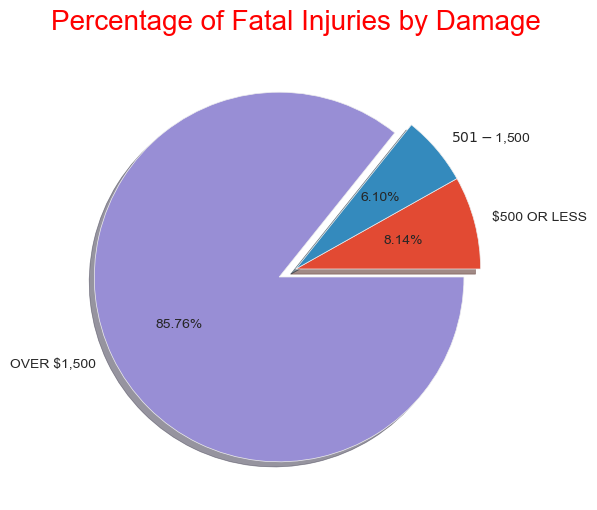

In [42]:
plt.figure(figsize=(10,6))
e = [0, 0, 0.1]
chicago_crashes[chicago_crashes["INJURIES_FATAL"] >= 1].groupby("DAMAGE")["INJURIES_FATAL"].count().plot(kind="pie", 
                                                                                                         shadow=True, 
                                                                                                         autopct="%.2f%%", 
                                                                                                         explode=e)
plt.title("Percentage of Fatal Injuries by Damage",
          color="Red",
          fontsize=20)
plt.ylabel("") 
print(f"85% of fatal injuries by damage fall in the 'over $1,500' category.")


This concludes our analysis of this dataset. We have demonstrated how to read data into a dataframe utilizing pandas, process and calculate data utilizing numpy, transform and manipulate data by extracting info from and creating new data columns, and visualize data in the form of a variety of different graphs utilizing matplotlib. In conjunction to using all of these skills, we were able to answer a host of questions related to the data to help us get a better understanding of what story the data has to tell. 